<a href="https://colab.research.google.com/github/tdlima/analise_aluguel_de_imoveis-AirBnB/blob/main/analise_imoveis_AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Expansão da Empresa AirBnB, na cidade de Nova York.

In [1]:
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium as fl

#Carregando a Base de Dados

In [ ]:
uploaded = files.upload()

In [3]:
data = pd.read_csv('/content/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 1. Calculando a Média de Todos os Valores de Aluguel da Cidade de Nova York.

In [ ]:
preco_aluguel = data.loc[:, 'price'] # Selecionando a coluna contendo o preço dos alugueis
np.mean(preco_aluguel) # Calculando a media dos alugueis

### Preço Médio dos Alugueis: U$152.72

# 2. Contando e Selecionando as Regiões da Cidade de Forma Distinta

In [ ]:
regiao = data.loc[:,'neighbourhood_group'] # Selecionando a coluna com as regiões
pd.unique(regiao) # Selecionando as regiões distintas

### Regiões: Brooklyn, Manhattan, Queens, Staten Island e Bronx.

# 3. Encontrando o Maior Valor Dentre os Preços dos Alugueis

In [ ]:
preco_aluguel = data.loc[:,'price']
np.max(preco_aluguel)

### Maior Valor de Aluguel: U$10.000

# 4. Encontrar as categorias de imóveis cadastrados na base de dados.

In [ ]:
categoria_imovel = data.loc[:,'room_type']
np.unique(categoria_imovel)

### Categorias encontradas: Home / Apt(casa/apt), Private room(Quarto priativo), Shared room(Quarto compartilhado)

# 5. Encontrar a quantidade de usuarios, únicos, cadastrados.

In [ ]:
users = data.loc[:,'host_id']
qtd_users = np.unique(users)
len(qtd_users)

### Quantidade de usuarios: 37.457

# 6. Calcular a variação de preços dos imóveis.

In [ ]:
price = data.loc[:,'price']
np.std(price)

### A variação de preço em torno da média é de U$ 240,15

# 7. Demonstrar em um grafico se a maioria dos imóveis são caros ou baratos.

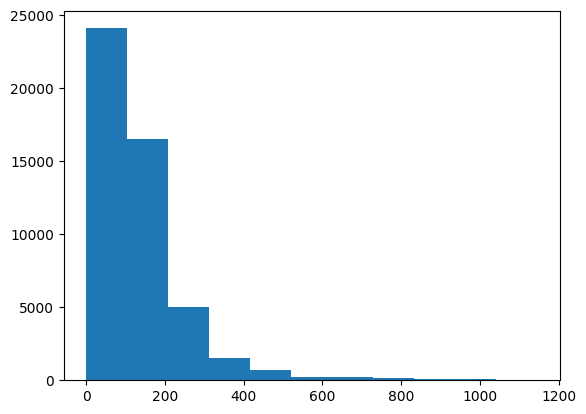

In [10]:
linhas = data.loc[:,'price'] < 1150
price = data.loc[linhas,'price']
plt.hist(price, bins=11);

# 8. Examinar a distribuição das reviews(avaliações). Os imóveis tem muitas ou poucas reviews?

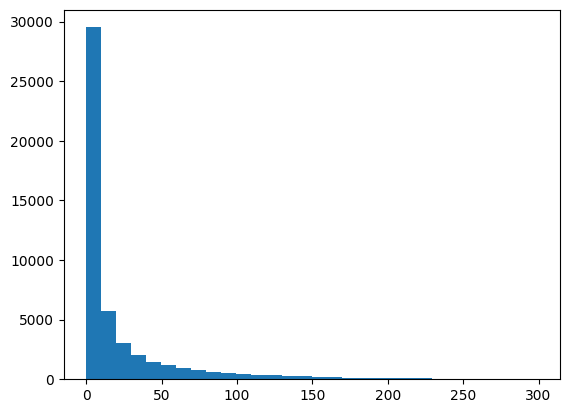

In [11]:
linhas = data.loc[:,'number_of_reviews'] < 300
reviews = data.loc[linhas,'number_of_reviews']
plt.hist(reviews, bins=30);

# 9. Encontrando a quantidade de proprietários por região.

In [12]:
# Selecionando colunas e fazendo agrupamento

(data.loc[:,['host_id','neighbourhood_group']]
      .groupby(['neighbourhood_group'])
      .nunique())

,host_id
neighbourhood_group,
Bronx,789
Brooklyn,15966
Manhattan,16578
Queens,3983
Staten Island,256


# 10. Encontrando o preço médio do aluguel por região

In [13]:
colunas = ['price','neighbourhood_group']
colunas_groupby = ['neighbourhood_group']

data.loc[:,colunas].groupby(colunas_groupby).mean()

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


## Preço médio por região

### Bronx 	     : 87.49
### Brooklyn 	   : 124.38
### Manhattan 	 : 196.87
### Queens 	     : 99.51
### Staten Island: 114.81

# 11. Média de numero de avaliações por preço de quarto

In [14]:
colunas = ['number_of_reviews','room_type']
colunas_groupby = ['room_type']

data.loc[:,colunas].groupby(colunas_groupby).mean()

,number_of_reviews
room_type,
Entire home/apt,22.842418
Private room,24.112962
Shared room,16.600000


### Entire home/apt 	22.84
### Private room 	24.11
### Shared room 	16.60

# 12. Encontrar o desvio padrão(Variação), do preço do aluguel por região e tipo de quarto.

In [15]:
colunas = ['price','neighbourhood_group','room_type']
colunas_groupby = ['neighbourhood_group','room_type']

data.loc[:,colunas].groupby(colunas_groupby).std()

price
neighbourhood_group room_type                  
Bronx               Entire home/apt   95.027102
                    Private room     107.009071
                    Shared room      101.798871
Brooklyn            Entire home/apt  226.415825
                    Private room     124.713499
                    Shared room       53.444485
Manhattan           Entire home/apt  331.830132
                    Private room     190.191318
                    Shared room       92.416534
Queens              Entire home/apt  129.383208
                    Private room     180.506756
                    Shared room      171.000607
Staten Island       Entire home/apt  394.600216
                    Private room      36.138245
                    Shared room       45.119594

## Região /	Tipo de Quarto / Variação de preço
### Bronx: 	Entire home/apt 95.02 / Private room 107.00 /  Shared room	101.79
### Brooklyn: 	Entire home/apt 226.41 / Private room 124.71 /Shared room 53.44
### Manhattan: 	Entire home/apt 331.83 / Private room	190.19 / Shared room 	92.41
### Queens: 	Entire home/apt	129.38 / Private room	180.50 / Shared room 	171.00
### Staten Island 	Entire home/apt	394.60 / Private room	36.13 / Shared room	45.11

# 13. Usar graficos para encontrar o valor(diario) de aluguel mais caro de cada região.

In [16]:
colunas = ['price','neighbourhood_group']
colunas_groupby = ['neighbourhood_group']

# Seleção de linhas e colunas

data_ploty = data.loc[:,colunas].groupby(colunas_groupby).max().reset_index()

In [17]:
px.bar(data_ploty, x='neighbourhood_group', y='price')

### Bronx: 2.500
### Brooklyn: 10.000
### Manhattan: 10.00
### Queens: 10.000
### Staten Island: 5.000

# 14. Localizar os imoveis com o valor de aluguel mais caro na cidade utilizando mapa.

In [18]:
# Selecionando e agrupando colunas
colunas = ['price','neighbourhood_group','latitude','longitude']
colunas_groupby = ['neighbourhood_group']

data_ploty = data.loc[:,colunas].groupby(colunas_groupby).max().reset_index()

In [19]:
# Desenhando o mapa
f = fl.Figure( width=1024, height=768)
map = fl.Map(
    location=[data_ploty.loc[:,'latitude'].mean(),
              data_ploty.loc[:,'longitude'].mean()],
    zoom_start=14,
    control_scale=True
)

for index, location_info in data_ploty.iterrows():
  fl.Marker([location_info['latitude'],
             location_info['longitude']],
            popup=location_info['neighbourhood_group']).add_to(map)

map

# 15. Localizar imóveis, no mapa, de acordo com seu tipo.

In [20]:
# Selecionando colunas
colunas = ['neighbourhood_group','room_type','latitude','longitude']
data_ploty = data.loc[:,colunas].sample(50) # selecionando linhas aleatórias

# Cirando nova coluna 'color'
data_ploty.loc[:,'color'] = 'NA'

linhas_private_room = data_ploty.loc[:,'room_type'] == 'Private room'
linhas_entire_apt = data_ploty.loc[:,'room_type'] == 'Entire home/apt'
linhas_shared_room = data_ploty.loc[:,'room_type'] == 'Shared room'

# Atribuindo valores a nova coluna
data_ploty.loc[linhas_private_room,'color'] = 'darkgreen'
data_ploty.loc[linhas_entire_apt,'color'] = 'darkred'
data_ploty.loc[linhas_shared_room,'color'] = 'purple'

# Desenhando o Mapa
map = fl.Map()

for index, location_info in data_ploty.iterrows():
  fl.Marker([location_info['latitude'],
             location_info['longitude']],
            popup=location_info['neighbourhood_group'],
            icon=fl.Icon(color=location_info['color'])
  ).add_to(map)


In [21]:
  map